<a href="https://colab.research.google.com/github/RudreshVeerkhare/Data_Science_Lab/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of Principal Component Analysis

Name - **Rudresh Veerkhare**  
UID - **2018130061**

In [1]:
# Donwloading data
!gdown --id "1ifgvz5fUFPsziwMYnr2Lx2TfxlcTFysi" -O data.csv

Downloading...
From: https://drive.google.com/uc?id=1ifgvz5fUFPsziwMYnr2Lx2TfxlcTFysi
To: /content/data.csv
100% 3.52M/3.52M [00:00<00:00, 193MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style = "whitegrid", rc = {"figure.figsize": (16, 12)})
import warnings
warnings.filterwarnings("ignore")

df_org = pd.read_csv("data.csv")
df_org.head()

,age,work_class,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df_org.shape

(32561, 15)

In [4]:
df_org.dtypes.value_counts()

object    9
int64     6
dtype: int64

In [5]:
# replace question mark with nan
df = df_org.copy()
df[df_org  == '?'] = np.nan

In [6]:
(df.isna().sum() * 100 / len(df)).sort_values(ascending = False)

occupation        5.660146
work_class        5.638647
native_country    1.790486
age               0.000000
final_weight      0.000000
education         0.000000
education_num     0.000000
marital_status    0.000000
relationship      0.000000
race              0.000000
sex               0.000000
capital_gain      0.000000
capital_loss      0.000000
hours_per_week    0.000000
income            0.000000
dtype: float64

Impute missing values, for **occupation**, **work_class** and **native_country**  
All 3 are categorical features so we'll replace it with mode of  respective columns

In [7]:
df["occupation"] = df["occupation"].fillna(df["occupation"].mode()[0])
df["work_class"] = df["work_class"].fillna(df["work_class"].mode()[0])
df["native_country"] = df["native_country"].fillna(df["native_country"].mode()[0])

In [8]:
df["native_country"].mode()[0]

'United-States'

In [9]:
 df.head()

,age,work_class,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## EDA

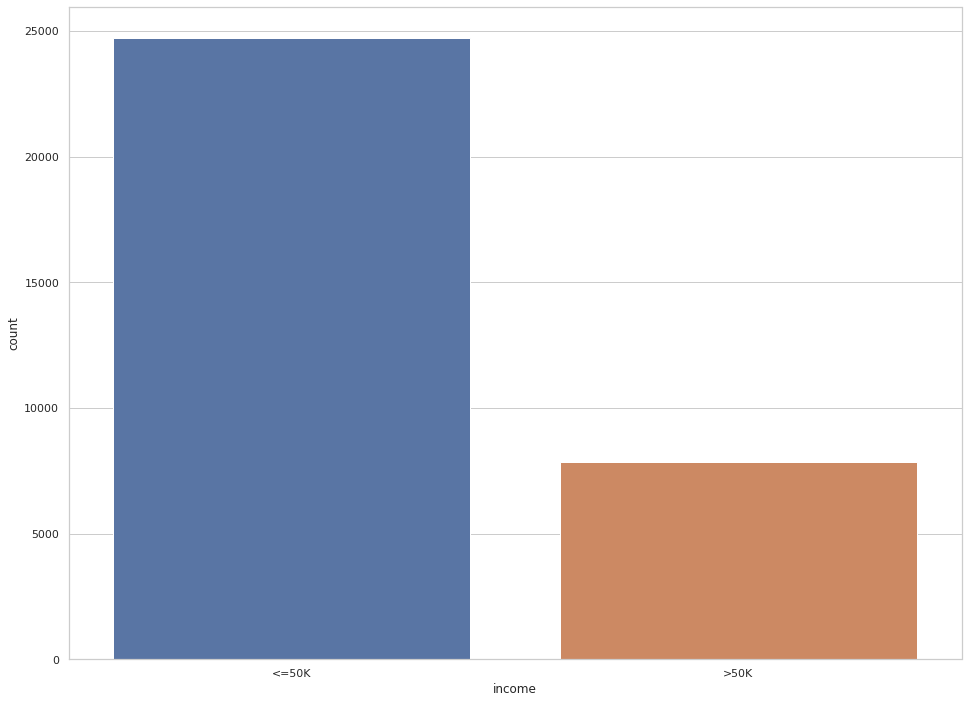

In [10]:
sns.countplot(df["income"])

There less people with income more that 50k

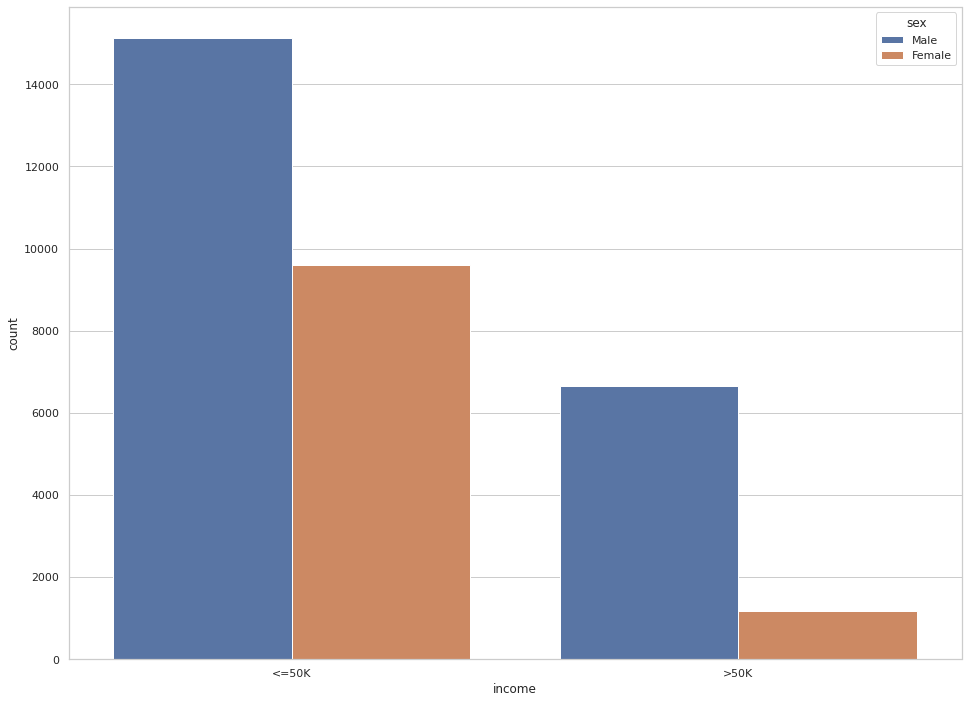

In [11]:
sns.countplot(data = df, x = "income", hue = "sex")

In both cases Male count is more, but in more that 50k class ratio is ratio is quite a large

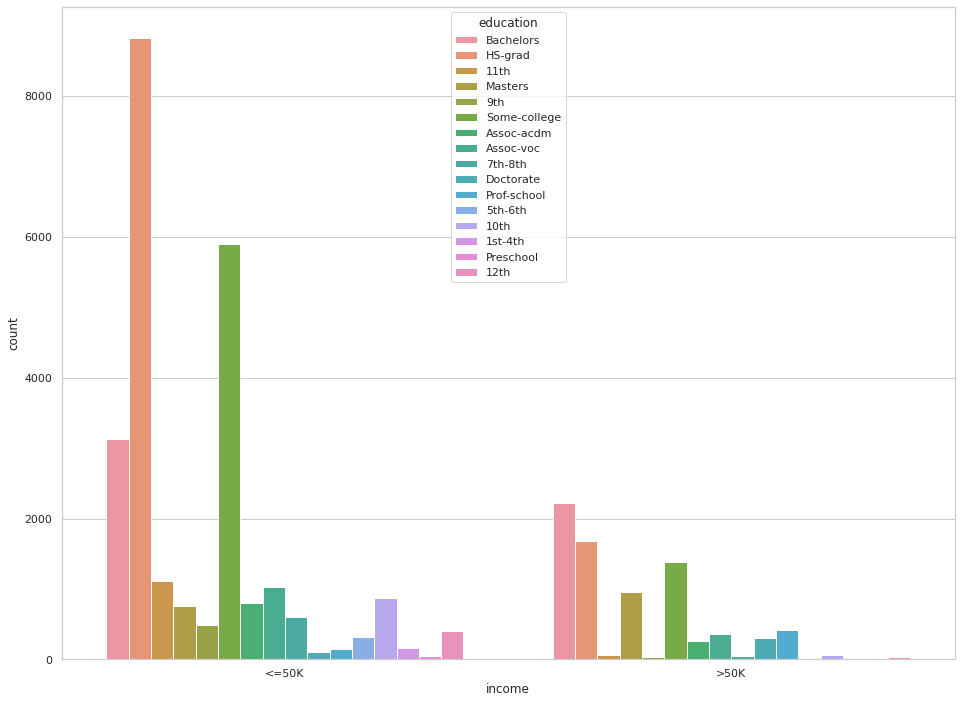

In [12]:
sns.countplot(data = df, x = "income", hue = "education")

In [13]:
def get_order(feature, plot = False):
    less = df[feature][df["income"] == "<=50K"]
    more = df[feature][df["income"] == ">50K"]

    order = (more.value_counts() / less.value_counts()).sort_values(ascending = False)
    if plot:
        sns.barplot(y = order.index, x = order.values, orient="h")
    return order

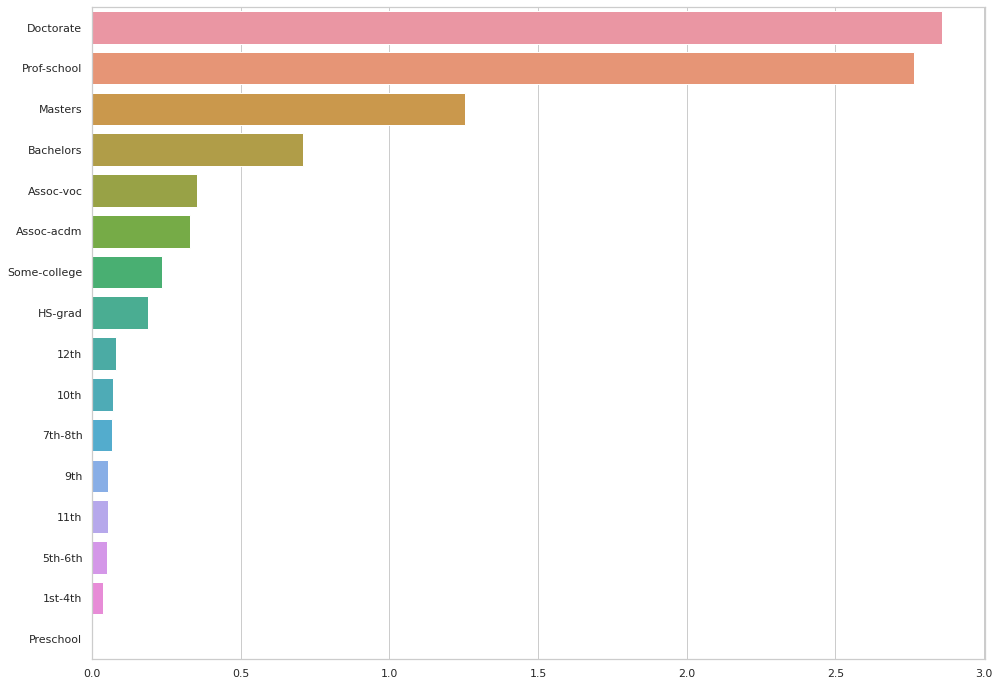

In [14]:
edu_order = get_order("education", True)

As it can be easily observed in above plot, if we sort education wrt the ratio of count in >50K to <=50K, then education order is clearly visible  
We'll use this order to encode the education feature

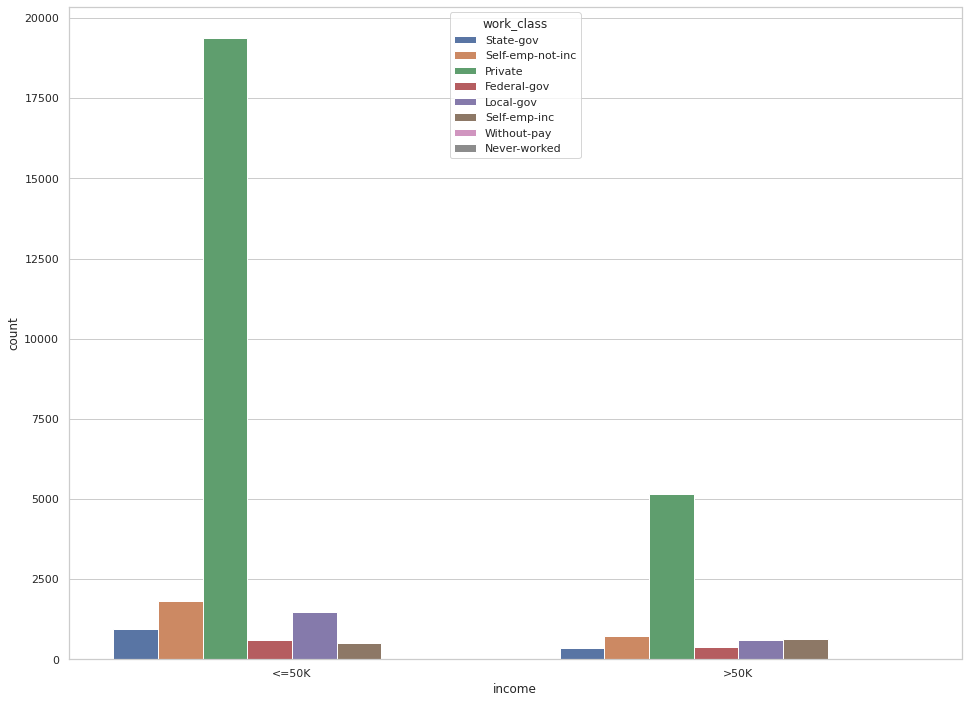

In [15]:
sns.countplot(data = df, x = "income", hue = "work_class")

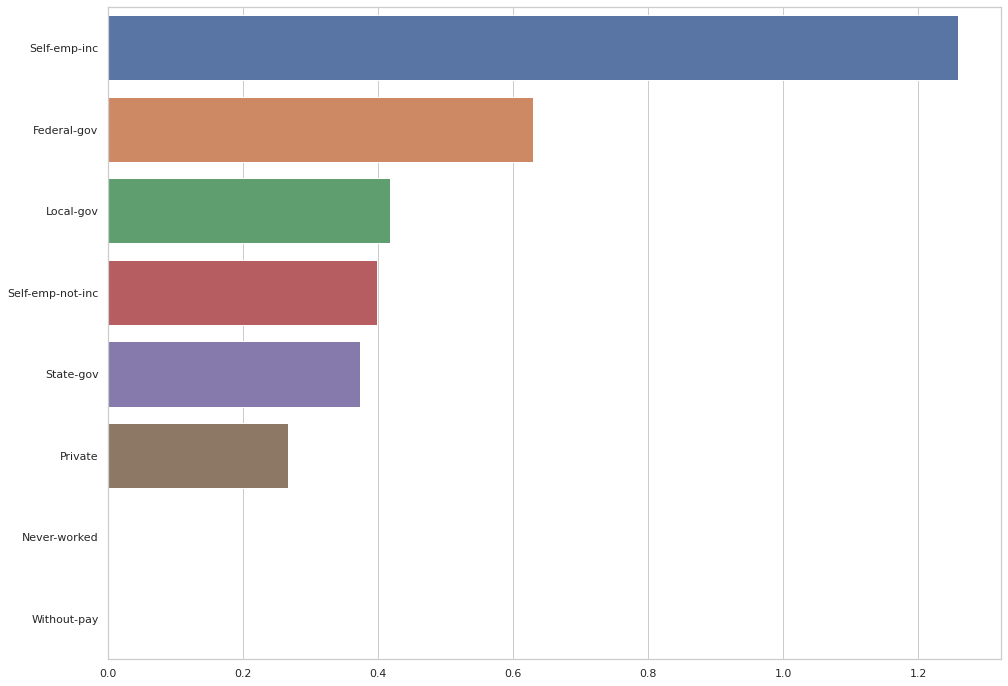

In [16]:
work_order = get_order("work_class", True)

Self Employeed and Federal-gov seems to have more salary

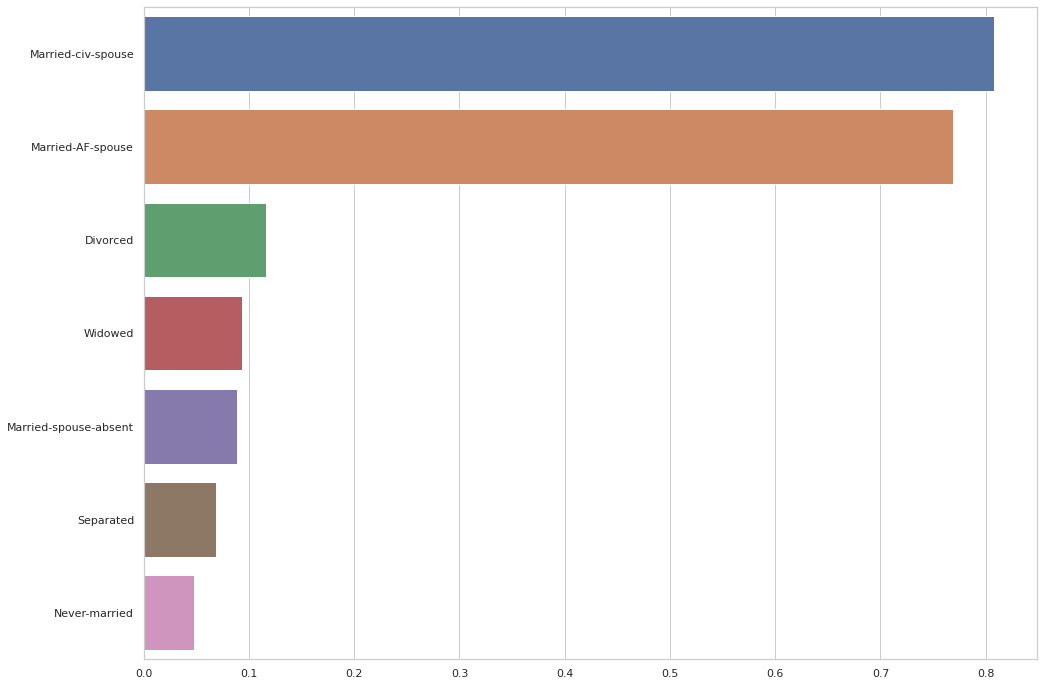

In [17]:
marital_status_order = get_order("marital_status", True)

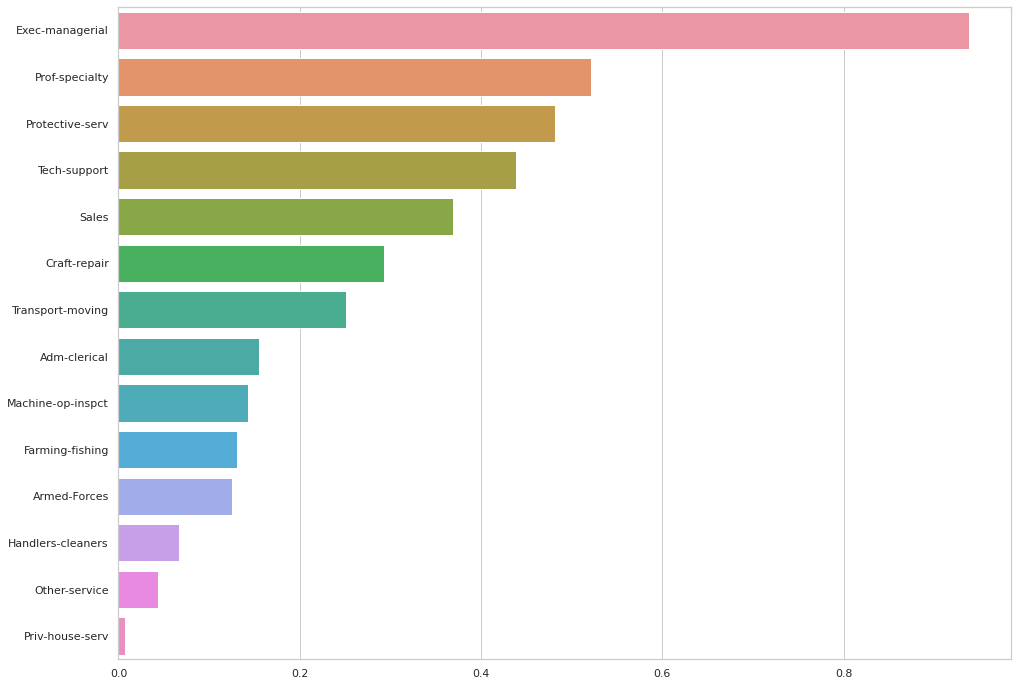

In [18]:
occupation_order = get_order("occupation", True)

From above graph Priv-house-serv is lowest paying vs Exec-managerial is higest paying job

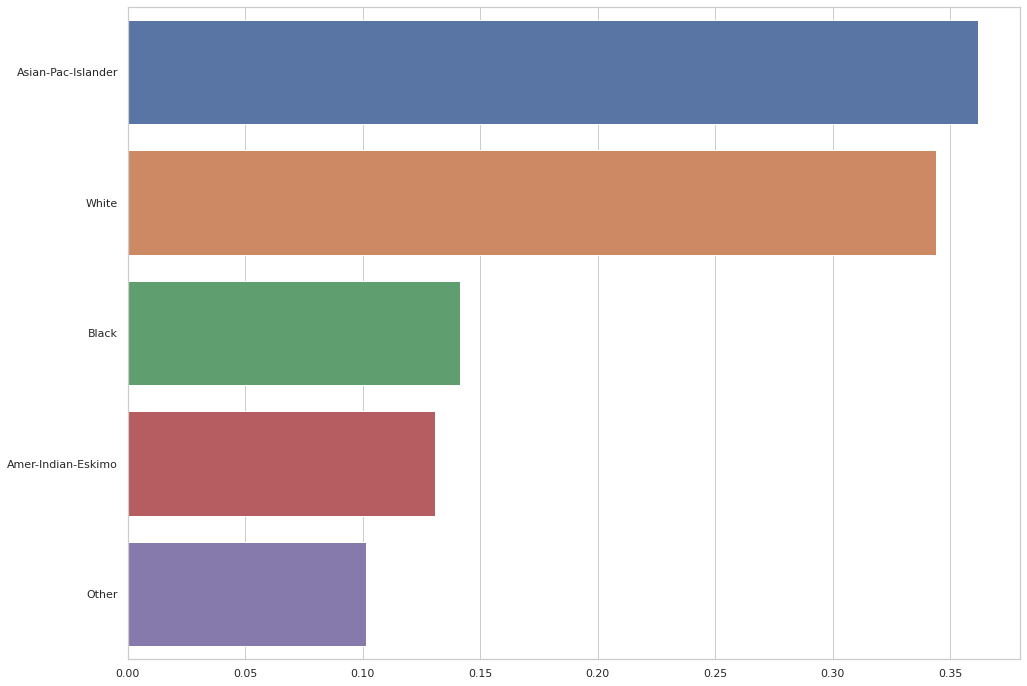

In [19]:
race_order = get_order("race", plot = True)

There is significant difference in different race, wrt earning.  
But more importantly this feature should be removed to prevent any biasedness based on race.

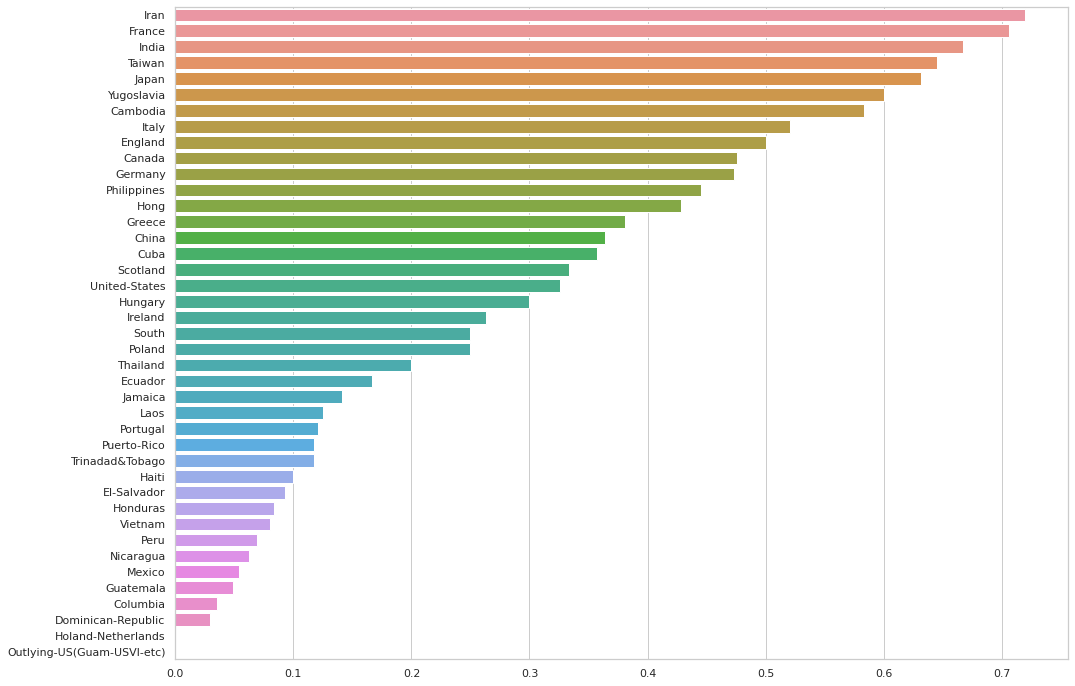

In [20]:
native_country_order = get_order("native_country", plot = True)

It seems such that the ratio of higher income to lower income is maximum in IRAN.

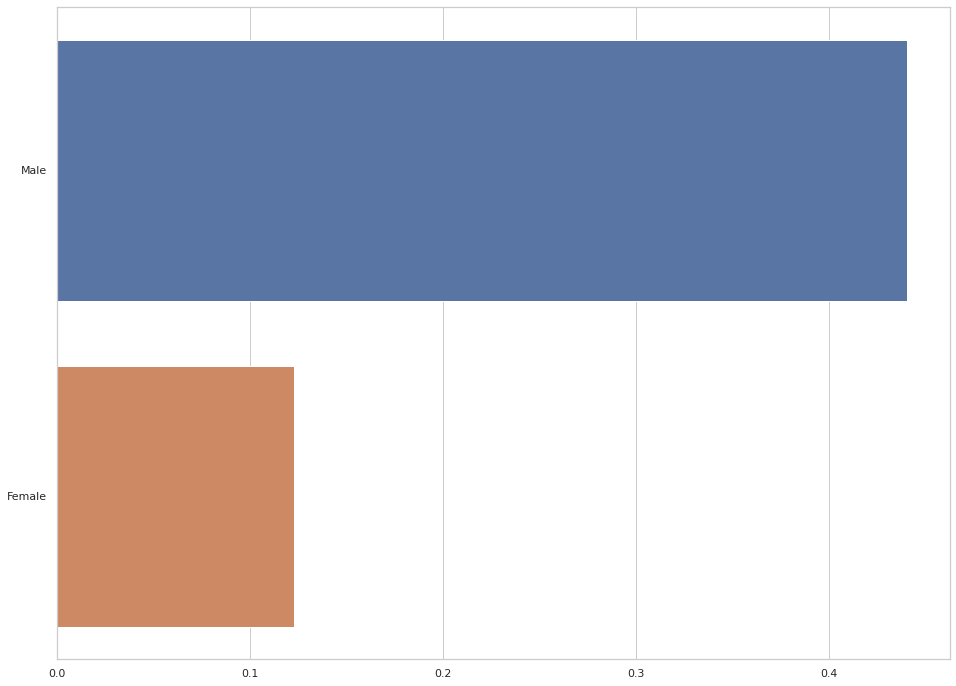

In [21]:
sex_order = get_order("sex", plot = True)

Data shows that, ratio is more in Male as compaired to Females.  
**This feature also should be remove to prevent gender bias in model** 

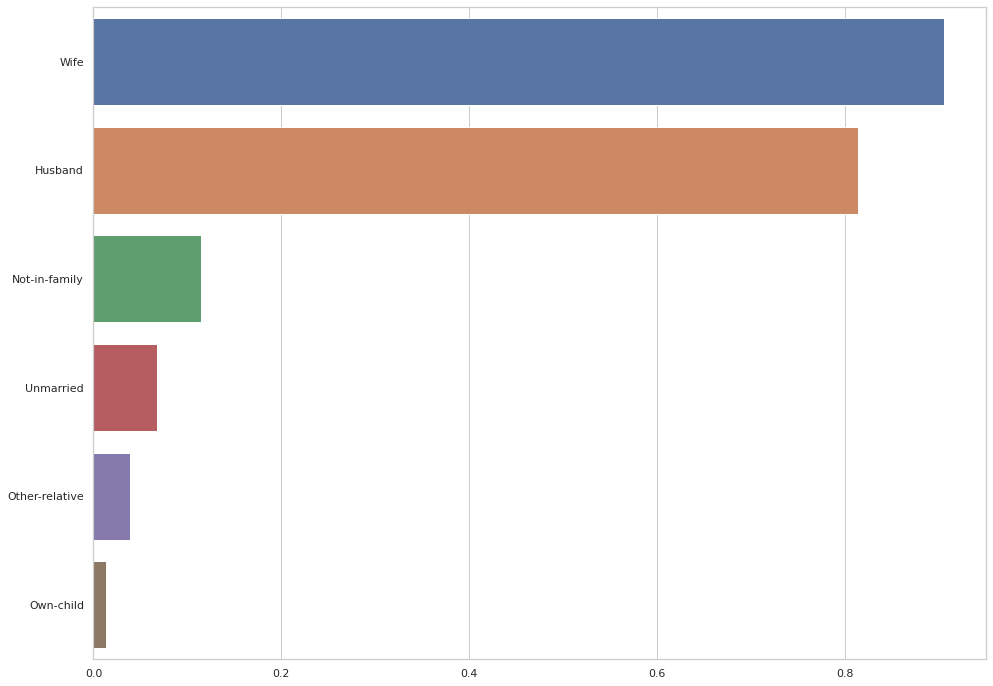

In [22]:
rel_order = get_order("relationship", True)

Married People have significantly hgher ratio compaired to other classes

## Data Spliting And Encoding

Drop `race` and `sex` feature

In [23]:
df_dropped = df.drop(["race", "sex"], axis = 1)
df_dropped.head()

,age,work_class,final_weight,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,40,Cuba,<=50K


Now encode categorical features based on the order that we derived from EDA

In [24]:
df_encoded = df_dropped.copy()
df_encoded["work_class"] = df_encoded["work_class"].map({key: len(work_order) - i for i, key in enumerate(work_order.index)})
df_encoded["occupation"] = df_encoded["occupation"].map({key: len(occupation_order) - i for i, key in enumerate(occupation_order.index)})
df_encoded["education"] = df_encoded["education"].map({key: len(edu_order) - i for i, key in enumerate(edu_order.index)})
df_encoded["marital_status"] = df_encoded["marital_status"].map({key: len(marital_status_order) - i for i, key in enumerate(marital_status_order.index)})
df_encoded["relationship"] = df_encoded["relationship"].map({key: len(rel_order) - i for i, key in enumerate(rel_order.index)})
df_encoded["native_country"] = df_encoded["native_country"].map({key: len(native_country_order) - i for i, key in enumerate(native_country_order.index)})
df_encoded["income"] = df_encoded["income"].map({"<=50K": 0, ">50K": 1})
df_encoded.sample(5)

,age,work_class,final_weight,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,income
17360,30,3,232356,13,13,7,14,5,0,0,40,24,1
6662,21,3,434102,10,10,1,7,4,0,0,40,24,0
24534,55,6,253062,10,10,7,13,5,0,0,40,24,1
26296,68,3,286869,6,4,4,13,4,0,1668,40,24,0
4224,18,3,152182,10,10,1,2,1,0,0,25,24,0


Standard scale data

In [25]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X = df_encoded.drop("income", axis = 1)
y = df_encoded["income"]

df_scaled = pd.DataFrame()
df_scaled[X.columns] = ss.fit_transform(X)
df_scaled.describe()

,age,work_class,final_weight,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country
count,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04
mean,-1.737807e-16,-7.511506e-16,-8.840254e-17,1.708245e-18,2.312098e-17,7.869862e-17,3.345910e-16,1.722020e-16,-1.726862e-16,1.832920e-16,5.995645e-16,1.043050e-15
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.582206e+00,-1.993822e+00,-1.681631e+00,-3.413767e+00,-3.529656e+00,-1.292087e+00,-2.080495e+00,-1.930559e+00,-1.459205e-01,-2.166595e-01,-3.194030e+00,-5.892237e+00
25%,-7.757679e-01,-5.042311e-01,-6.816910e-01,-3.962152e-01,-4.200596e-01,-1.292087e+00,-5.205670e-01,-5.845004e-01,-1.459205e-01,-2.166595e-01,-3.542945e-02,1.059551e-01
50%,-1.159546e-01,-5.042311e-01,-1.082193e-01,-1.902130e-02,-3.136003e-02,2.026908e-01,-5.908638e-04,8.852873e-02,-1.459205e-01,-2.166595e-01,-3.542945e-02,1.059551e-01
75%,6.904838e-01,-5.042311e-01,4.478765e-01,7.353665e-01,7.460392e-01,9.500795e-01,1.039361e+00,7.615579e-01,-1.459205e-01,-2.166595e-01,3.695194e-01,1.059551e-01
max,3.769612e+00,3.219746e+00,1.226856e+01,2.244142e+00,2.300838e+00,9.500795e-01,1.299349e+00,1.434587e+00,1.339458e+01,1.059351e+01,4.742967e+00,4.539401e+00


Co-relation analysis

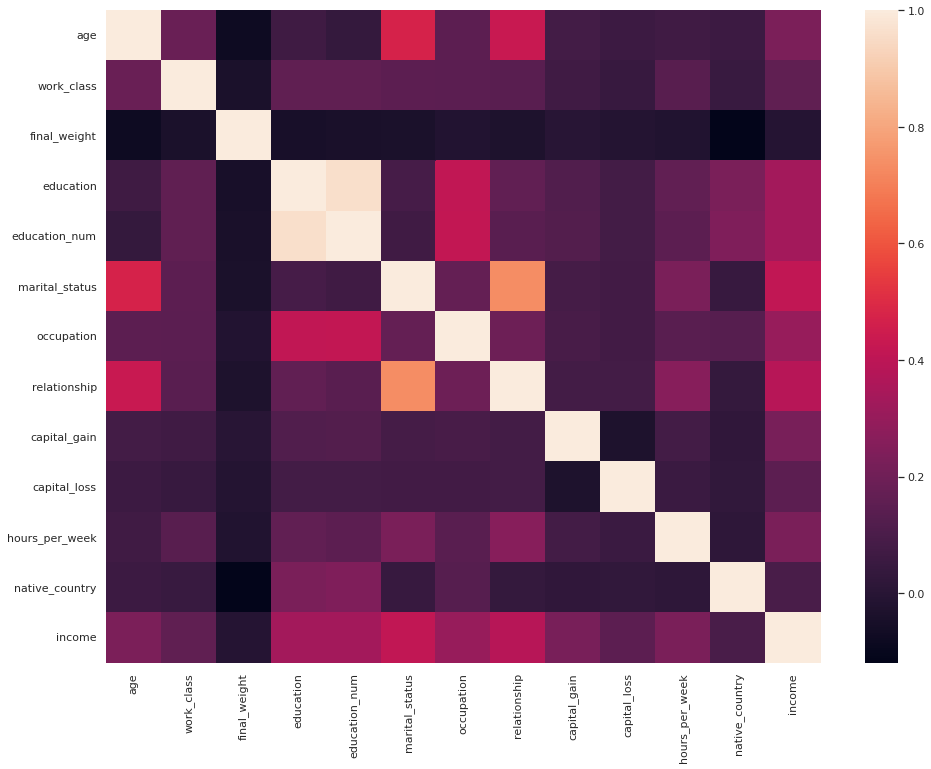

In [26]:
corr = pd.concat([
    df_scaled,
    y
], axis = 1).corr()
sns.heatmap(corr)

`education` and `education_num` are highly correlated, so lets drop one of them.

In [27]:
df_scaled = df_scaled.drop("education_num", axis = 1)

Split data in train and testing split

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size = 0.2, random_state = 42)

## Logistic Regression Model Without PCA

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)

print('Logistic Regression accuracy score without using PCA: {0:0.4f}'. format(accuracy_score(y_test, pred)))

Logistic Regression accuracy score without using PCA: 0.8515


In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, pred)))
print('Precision score: {}'.format(precision_score(y_test, pred, pos_label=1)))
print('Recall score: {}'.format(recall_score(y_test, pred, pos_label=1)))
print('F1 score: {}'.format(f1_score(y_test, pred, pos_label=1)))

Accuracy score: 0.8515277138031629
Precision score: 0.7423756019261637
Recall score: 0.5887969446212603
F1 score: 0.6567270145544906


In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4942
           1       0.74      0.59      0.66      1571

    accuracy                           0.85      6513
   macro avg       0.81      0.76      0.78      6513
weighted avg       0.84      0.85      0.85      6513



Accuracy of **85%** is obtained, using logistics regression without using PCA

## Using PCA 

In [69]:
from sklearn.decomposition import PCA

scores = []
for i in range(1, 11):
    pca = PCA(n_components=i / 10 - 0.01)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    logreg = LogisticRegression()
    logreg.fit(X_train_pca, y_train)
    pred = logreg.predict(X_test_pca)

    acc = accuracy_score(y_test, pred)
    scores.append((i / 10 - 0.01, acc))

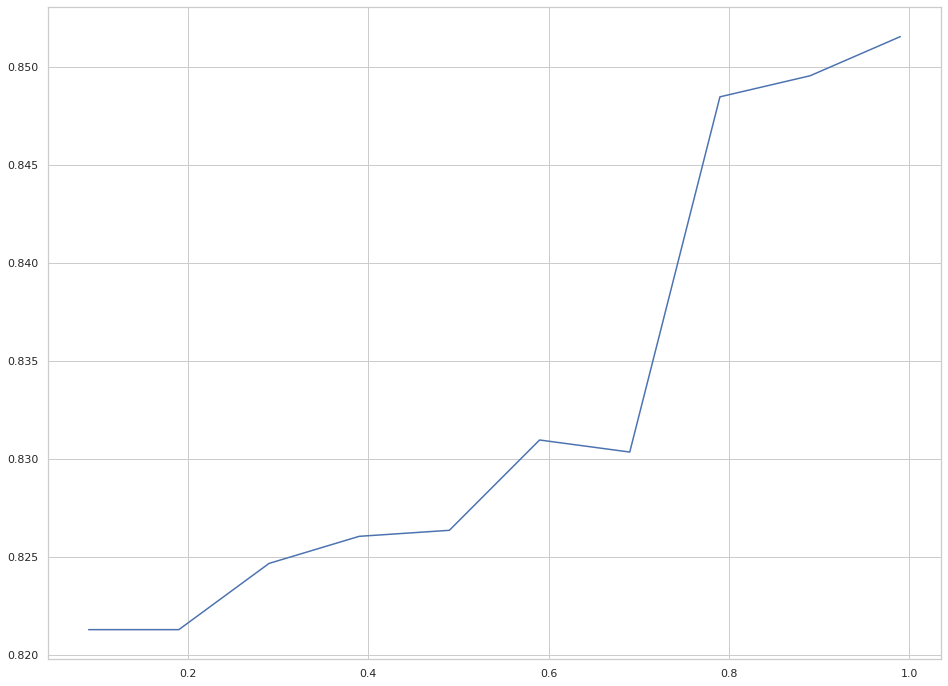

In [70]:
sns.lineplot(
    x = map(lambda x: x[0], scores),
    y = map(lambda x: x[1], scores)
)

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train_pca, y_train)
pred = logreg.predict(X_test_pca)

print('Logistic Regression accuracy score without using PCA: {0:0.4f}'. format(accuracy_score(y_test, pred)))

Logistic Regression accuracy score without using PCA: 0.8495


In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, pred)))
print('Precision score: {}'.format(precision_score(y_test, pred, pos_label=1)))
print('Recall score: {}'.format(recall_score(y_test, pred, pos_label=1)))
print('F1 score: {}'.format(f1_score(y_test, pred, pos_label=1)))

Accuracy score: 0.849531705819131
Precision score: 0.738498789346247
Recall score: 0.5824315722469765
F1 score: 0.6512455516014235


In [67]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4942
           1       0.74      0.58      0.65      1571

    accuracy                           0.85      6513
   macro avg       0.81      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513



While using PCA in only 9 features also we are getting nearly same Accuracy.

## Conclusion

Performed classification on given Census Dataset, used PCA to analyze Dimensionality of the dataset and then based on the total explained varience fintuned the feature selection